## **演示0902：核函数**

### **线性可分与线性不可分**
* 如果无法使用一条直线(或者一阶变量)来作为分割超平面，那么称为该样本数据线性不可分
* 线性不可分的数据集无法使用前述SVM直接计算，此时需要将原有数据的Feature(X)通过某个函数进行转换，使转换后的样本能够线性可分
![](../images/090201.png)

### **Cover定理**
将复杂的模式分类问题非线性地投射到高阶空间将比投射到低阶空间更可能是线性可分  
* 下图中的一阶数据，-1,0,1三个点属于一个分类，其余数据点属于另一个分类。显然，这是线性不可分的  
![](../images/090202.png)  
* 对各点投射到二阶空间(取平方)，可以看到，此时的数据已经是线性可分了  
![](../images/090203.png)  
* 因此使用一个非线性映射$\phi(x)$将全部原始数据$x$变换到另一个特征空间，在这个空间中，样本就很可能变得线性可分了。当然引入高阶问题会使计算变复杂

### **核函数**
映射函数$\phi(x)$是很难直接定义的，所以一般不会直接指定该函数  
回顾拉格朗日对偶问题：  
$ \left\{\begin{aligned}
target: & {max \atop {\alpha, b}} \sum_{i=1}^m \alpha_i - \dfrac{1}{2} \sum_{i=1}^m (\alpha_i y^{(i)}) * \sum_{j=1}^m [\alpha_j y^{(j)} (x^{(i)})^T x^{(j)}] \\ \\
s.t.: & \left\{\begin{aligned}
\alpha_i \ge 0 \\
\sum_{i=0}^m \alpha_i y^{(i)} = 0
\end{aligned}\right.
\end{aligned}\right. $  
* 可以看到，只有一项计算与样本的Feature相关，就是任意两个样本的内积：$(x^{(i)})^T x^{(j)} $。因此，映射后，这个内积就变成：$\phi(x^{(i)})^T \phi(x^{(j)}) $
* SVM绕过了$\phi(x)$函数本身的定义，而是直接使用核函数取代映射后的内积计算，即：$K(x_i,x_j )=\phi(x_i)^T \phi(x_j) $
* 常用的核函数叫径向基函数(RBF)，也叫高斯核函数：$K(x_1,x_2)=e^{-\dfrac{||x_1 -x_2||^2}{2 \sigma^2}}$
* 在给定了核函数之后，无需再计算出$\phi(x)$本身值，就能计算出其映射后的内积，从而能够使SVM的计算过程顺利进行，最终的对偶问题为：  
$
\left\{\begin{aligned}
target: & {max \atop {\alpha, b}} \sum_{i=1}^m \alpha_i - \dfrac{1}{2} \sum_{i=1}^m (\alpha_i y^{(i)}) * \sum_{j=1}^m [\alpha_j y^{(j)} K(x^{(i)}, x^{(j)})] \\ \\
s.t.: & \left\{\begin{aligned}
\alpha_i \ge 0 \\
\sum_{i=0}^m \alpha_i y^{(i)} = 0
\end{aligned}\right.
\end{aligned}\right. $  
* 最终的判别函数为：  
$ h(x)=sign(w^T * x+b)=sign(\sum_{i=1}^m \alpha_i y^{(i)} K(x^{(i)},x)+b) $

### **案例1：观察不同的核函数对分类边界的影响**

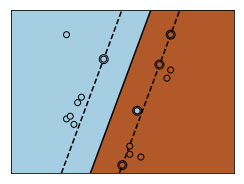

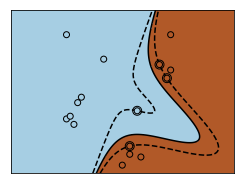

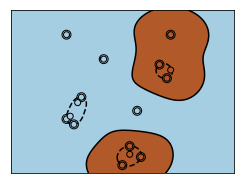

In [1]:
''' 观察不同核函数对SVM分类边界的影响 '''

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

X = np.c_[(.4, -.7),
    (-1.5, -1),
    (-1.4, -.9),
    (-1.3, -1.2),
    (-1.1, -.2),
    (-1.2, -.4),
    (-.5, 1.2),
    (-1.5, 2.1),
    (1, 1),
    (1.3, .8),
    (1.2, .5),
    (.2, -2),
    (.5, -2.4),
    (.2, -2.3),
    (0, -2.7),
    (1.3, 2.1)].T       # 16x2

# 16个元素的一维向量，8个0，8个1
# 意味着前8个X点属于分类0，而后8个X点属于分类1
Y = [0] * 8 + [1] * 8   

fignum = 1      # 记录图像编号
for kernel in ('linear', 'poly', 'rbf'):
    clf = svm.SVC(kernel=kernel, gamma=2)
    clf.fit(X, Y)
    
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    # 绘制支持向量点
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80, 
        facecolors='none', zorder=10, edgecolors='k')
    # 绘制原始数据点
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired,
        edgecolors='k')
    plt.axis('tight')
    x_min = -3
    x_max = 3
    y_min = -3
    y_max = 3
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    # 绘制决策边界线
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-1, 0, 1])
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1

plt.show()